### 事前準備

In [1]:
!pip install -q captum

     |████████████████████████████████| 1.4 MB 4.2 MB/s 


In [2]:
import numpy as np

import requests
from io import BytesIO

from PIL import Image

import torchvision
from torchvision import transforms

from captum.attr import DeepLift
from captum.attr import visualization as viz

In [3]:
# モデルの読み込み
model = torchvision.models.mobilenet_v2(pretrained=True).eval()

# 画像の読み込み
response = requests.get("https://image.freepik.com/free-photo/two-beautiful-puppies-cat-dog_58409-6024.jpg")
img = Image.open(BytesIO(response.content))

# transforms
transform = transforms.Compose([
                                transforms.Resize(256),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

input_img = transform(img).unsqueeze(0)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

### DeepLift
https://captum.ai/api/deep_lift.html

In [4]:
dl = DeepLift(model)

target=208                                                  # ImageNetにおけるラブラドール（Labrador retriever）のインデックス  

attribution_dog = dl.attribute(input_img,
                              target=target,
                              baselines=0)


target=283                                                  # ImageNetにおけるペルシアン猫（Persian cat）のインデックス

attribution_cat = dl.attribute(input_img,
                              target=target,
                              baselines=0)

/usr/local/lib/python3.7/dist-packages/captum/_utils/gradient.py:59: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  "required_grads has been set automatically." % index
/usr/local/lib/python3.7/dist-packages/captum/attr/_core/deep_lift.py:339: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  after the attribution is finished"""


### 可視化

In [5]:
center_crop = transforms.Compose([
 transforms.Resize(256),
 transforms.CenterCrop(224),
])

# compute attributionのテンソルをimageのようなnumpy配列に変換する
# 配列の軸の順番を入れ替える
attribution_dog = np.transpose(attribution_dog.squeeze().cpu().detach().numpy(), (1,2,0))
attribution_cat = np.transpose(attribution_cat.squeeze().cpu().detach().numpy(), (1,2,0))

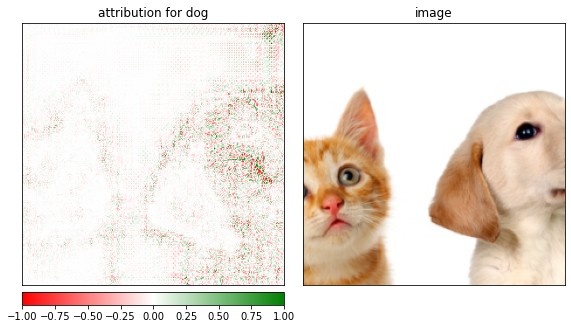

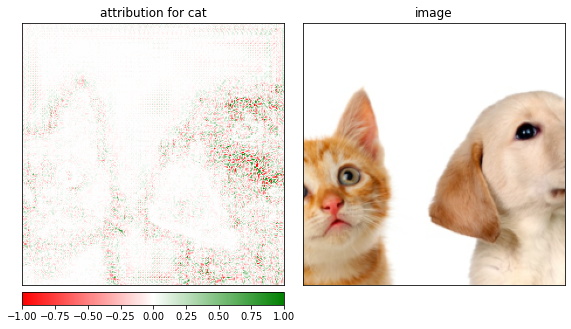

In [6]:
vis_types = ["heat_map", "original_image"]
vis_signs = ["all", "all"]

_ = viz.visualize_image_attr_multiple(attribution_dog,
                                      np.array(center_crop(img)),
                                      vis_types,
                                      vis_signs,
                                      ["attribution for dog", "image"],
                                      show_colorbar = True
                                     )

_ = viz.visualize_image_attr_multiple(attribution_cat,
                                      np.array(center_crop(img)),
                                      ["heat_map", "original_image"],
                                      ["all", "all"],
                                      ["attribution for cat", "image"],
                                      show_colorbar = True
                                     )